In [1]:
import cv2
import numpy as np
import torch
import torchvision.transforms.v2 as T
import random
from PIL import Image
import matplotlib.pyplot as plt

random.seed(2025)
torch.manual_seed(2025)
plt.rcParams["savefig.bbox"] = 'tight'

In [2]:
def flip_horizontal(image, mask):
    image = np.fliplr(image)
    mask = np.fliplr(mask)
    return image, mask

def flip_vertical(image, mask):
    image = np.flipud(image)
    mask = np.flipud(mask)
    return image, mask

In [38]:
def rotate(image, mask, max_angle=30.):
    image = np.array(image)
    mask = np.array(mask)

    angle = random.uniform(-max_angle, max_angle)
    height, width = image.shape[:2] 
    center = (width/2, height/2) 

    # Get rotation matrix
    matrix = cv2.getRotationMatrix2D(center, angle, 1)

    # Rotate image and mask
    image = cv2.warpAffine(image, matrix, (width, height), flags=cv2.INTER_LINEAR)
    mask = cv2.warpAffine(mask, matrix, (width, height), flags=cv2.INTER_NEAREST)

    return image, mask

In [42]:
def translate(image, mask, max_shift=0.1):
    image = np.array(image)
    mask = np.array(mask)

    height, width = image.shape[:2] 
    shift = random.uniform(-max_shift, max_shift)
    
    # Compute translation amounts
    shift_x = shift * width
    shift_y = shift * height

    # Get translation matrix
    matrix = np.float32([[1, 0, shift_x], [0, 1, shift_y]])

    # Translate image and mask
    image = cv2.warpAffine(image, matrix, (width, height), flags=cv2.INTER_LINEAR)
    mask = cv2.warpAffine(mask, matrix, (width, height), flags=cv2.INTER_NEAREST)

    return image, mask

In [52]:
def elastic_transform(image, mask, alpha=50.0, sigma=5.0):
    image = T.ToTensor()(image)
    mask = T.ToTensor()(mask)

    transform = T.ElasticTransform(alpha=alpha, sigma=sigma)
    image = transform(image)
    mask = transform(mask)

    return image, mask

In [54]:
def color_jitter(image, mask):
    image = T.ToTensor()(image)

    transform = T.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1)
    image = transform(image)
    
    return image, mask

In [60]:
def random_crop(image, mask, crop_size=(200, 200)):
    image = np.array(image)
    mask = np.array(mask)

    height, width = image.shape[:2]
    crop_height, crop_width = crop_size

    # Make sure image is larger than crop size
    if height > crop_height and width > crop_width: 
        # Get new x, y coordinates
        start_x = random.randint(0, width - crop_width)
        start_y = random.randint(0, height - crop_height)

        # Crop image and mask
        image = image[start_y:start_y+crop_height, start_x:start_x+crop_width]
        mask = mask[start_y:start_y+crop_height, start_x:start_x+crop_width]

    return image, mask

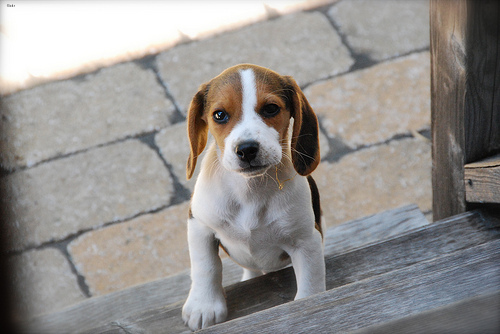

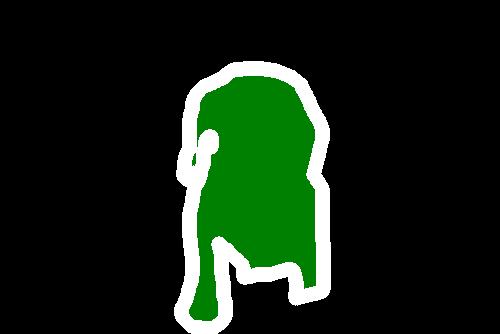

In [39]:
original_image = Image.open("../Dataset/TrainVal/color/beagle_101.jpg")
original_mask = Image.open("../Dataset/TrainVal/label/beagle_101.png")
display(original_image, original_mask)

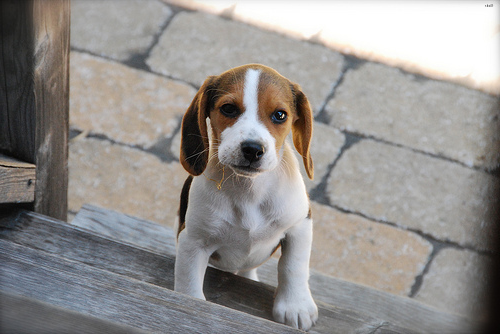

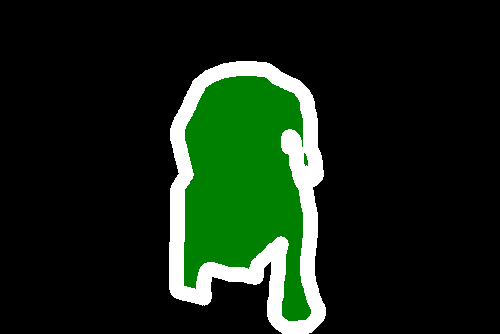

In [59]:
flipped_image, flipped_mask = flip_horizontal(original_image, original_mask)
flipped_image = Image.fromarray(flipped_image)
flipped_mask = Image.fromarray(flipped_mask, mode="P")
flipped_mask.putpalette(original_mask.palette)
display(flipped_image, flipped_mask)

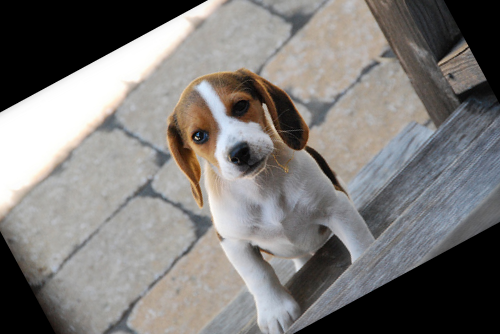

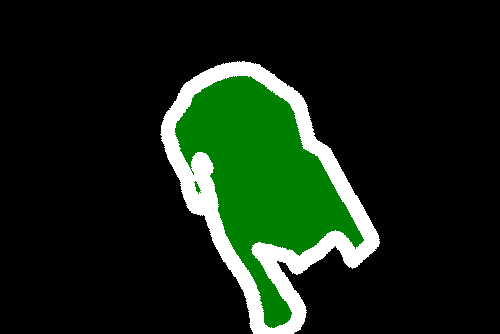

In [41]:
rotated_image, rotated_mask = rotate(original_image, original_mask)

rotated_image = Image.fromarray(rotated_image)
rotated_mask = Image.fromarray(rotated_mask, mode='P')
rotated_mask.putpalette(original_mask.palette)

display(rotated_image, rotated_mask)

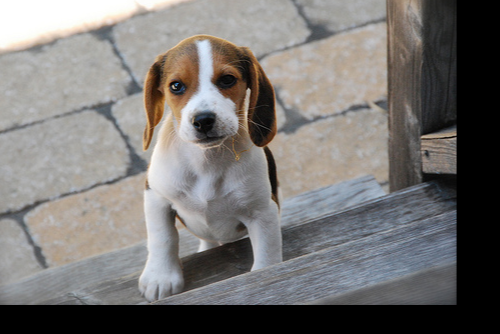

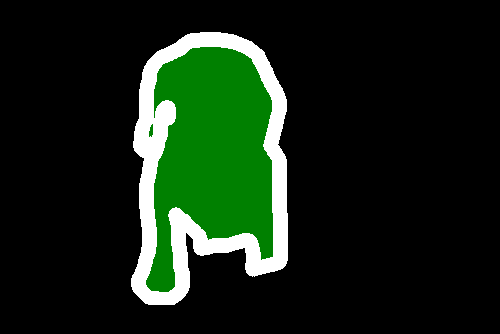

In [44]:
translated_image, translated_mask = translate(original_image, original_mask)

translated_image = Image.fromarray(translated_image)
translated_mask = Image.fromarray(translated_mask, mode='P')
translated_mask.putpalette(original_mask.palette)

display(translated_image, translated_mask)

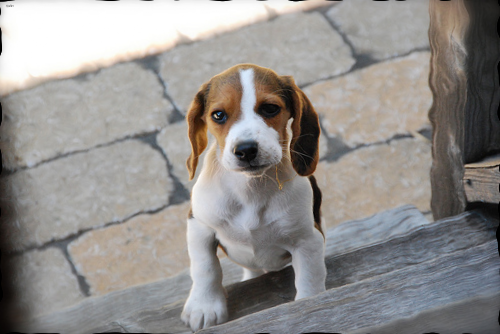

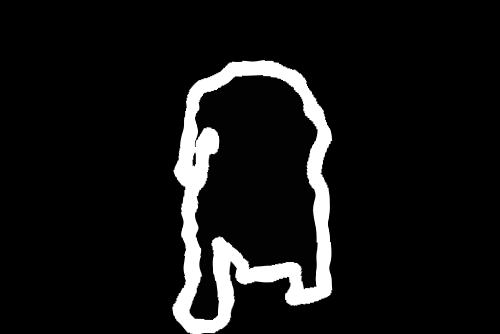

In [53]:
elastic_image, elastic_mask = elastic_transform(original_image, original_mask)
elastic_image = T.ToPILImage()(elastic_image)
elastic_mask = T.ToPILImage()(elastic_mask)

display(elastic_image, elastic_mask)

/Users/MinhAnh/miniconda3/envs/cv/lib/python3.12/site-packages/torchvision/transforms/v2/_deprecated.py:42: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.Output is equivalent up to float precision.
  warnings.warn(


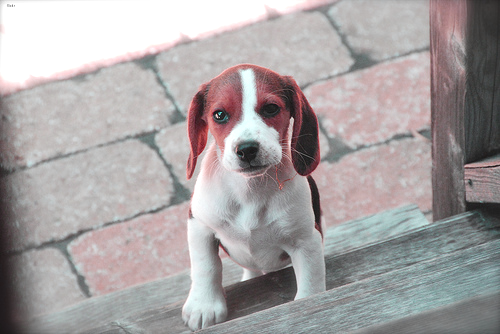

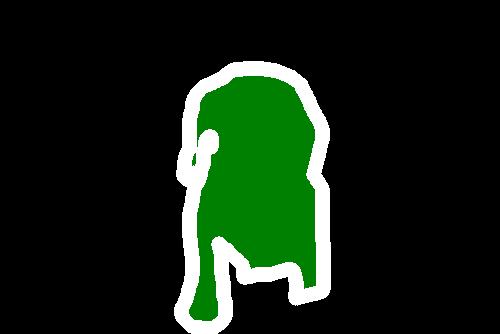

In [55]:
jitter_image, jitter_mask = color_jitter(original_image, original_mask)
jitter_image = T.ToPILImage()(jitter_image)
jitter_mask = T.ToPILImage()(jitter_mask)

display(jitter_image, jitter_mask)

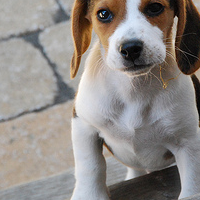

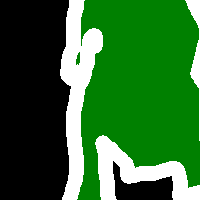

In [69]:
cropped_image, cropped_mask = random_crop(original_image, original_mask, crop_size=(200, 200))
cropped_image = Image.fromarray(cropped_image)
cropped_mask = Image.fromarray(cropped_mask, mode="P")
cropped_mask.putpalette(original_mask.palette)

display(cropped_image, cropped_mask)